In [4]:
# Importing Libraries.

import sqlite3
import pandas as pd

In [6]:
# Reding and Saving The Data into DataSet From CSV File.

df = pd.read_csv("C:\\Data Science\\Intellimark\\Task 7\\archive (4)\\sales_data.csv")

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity,Product,Unit_Cost,Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2/3/2023,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,4/21/2023,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,9/21/2023,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,8/24/2023,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,3/24/2023,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [8]:
# Making Connection For Sqlite.

conn = sqlite3.connect('sales_data.db')

In [9]:
# Loding Data To Sales_data.db

df.to_sql('Sales_data', conn, if_exists = 'replace')

1000

In [11]:
# Query For New Data Set.

query = "Select Product, Sum(Quantity) as total_qty, Sum(Quantity * Price) as revenue from Sales_data Group By Product;"

In [29]:
# Loading Expecting Data Into New DataSet Name Sales_df.

sales_df = pd.read_sql_query(query, conn)
sales_df

ProgrammingError: Cannot operate on a closed database.

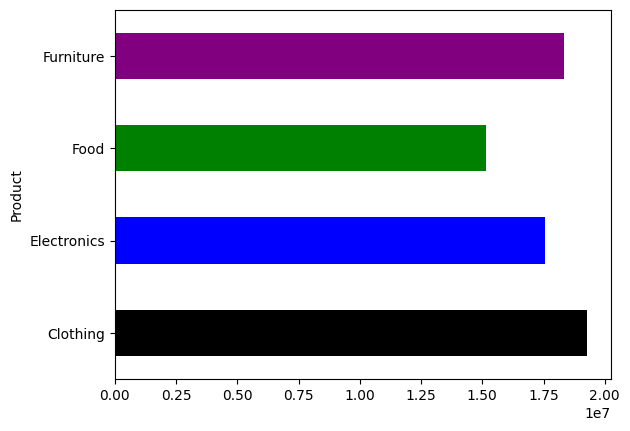

In [24]:
#  Ploting The Bar Plot.

import matplotlib.pyplot as plt
sales_df.plot(kind='barh',x='Product', y='revenue', color=['black', 'blue', 'green', 'purple'], legend=False)


# Saving The Bar Plot As PNG.
plt.savefig("sales_chart.png", dpi=300, bbox_inches='tight')

plt.show()

In [25]:
# Closing Connection From Sqlite3.

conn.close()